por hacer

revisar promedio de rondas por partida

revisar kills por ronda

# **Diccionario Imports**
- df = data frame (Data donde esta toda la informacion extraida del excel para  usarla)
- pd = para llamar a pandas(Esto ya esta definido en los imports)
- plt = para llamar al matplotlib
- sns = para llamar a seaborn

# **Diccionario Variables**
y_regresion = contiene la variable regresion (MatchKills)

y_clasificacion = contiene la variable clasificacion (MatchWinner)

df_inferno = contiene la cantidad de veces que se jugo el mapa de inferno


# Evaluación 1

---



**Autores:**

1. Juan Pablo Arriagada
2. Carlos Soto
3. Jose Toledo




**Correos Electrónicos:**


1. ju.arriagadar@duocuc.cl
2. car.sotoa@duocuc.cl
3. jo.toledoo@duocuc.cl

**Fecha de Creación:** Septiembre 2025

**Versión:** 1.0  



---

## Descripción

Este notebook corresponde al desarrollo de la entrega 1 de la asignatura electiva de Fudnamentos de Machine Learning de DuocUC - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

-
    pandas
    numpy
    matplotlib
    seaborn

-

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

# Puntajes y descuentos

1.	Fase 1 - Análisis de datos entregados para regresión
2.	Fase 1 - Análisis de datos entregados para clasificación
3.	Fase 1 - Análisis de otros datos no presentes
4.	Fase 1 - Definición de objetivos Fase 2
5.	Fase 1 - Definición de objetivos Fase 3
6.	Fase 1 - Definición de objetivos Fase 4
7.	Fase 1 - Definición de objetivos Fase 5
8.	Fase 2 - Análisis de tipos de datos
9.	Fase 2 - Existencia de nulos
10.	Fase 2 - Existencia de duplicados
11.	Fase 2 - Existencia de atípicos
12.	Fase 2 - Cálculo de estadísticos de variable continua
13.	Fase 2 - Interpretación de estadísticos de variable continua
14.	Fase 2 - Cálculo de estadísticos de variable discreta
15.	Fase 2 - Interpretación de estadísticos de variable discreta
16.	Fase 2 - Aplicación CORRECTA de prueba ANOVA
17.	Fase 2 - Análisis de distribución de una variable
18.	Fase 2 - Análisis correcto de correlación

**DESCUENTOS SOBRE PUNTAJE FINAL**

1. Ausencia de buenas prácticas	10%
2. Ausencia de formato base de notebook	10%
3. Falta identificación de autores trabajo	10%
4. Faltas de ortografía y readacción 10%

In [ ]:
!wget https://www.dropbox.com/s/sst1u94436vqca6/demo_round_traces.csv

--2025-09-24 18:35:41--  https://www.dropbox.com/s/sst1u94436vqca6/demo_round_traces.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/ujmigz0ky1r9ps75u8h1d/demo_round_traces.csv?rlkey=24f4k6ipomzkq1lj8kz2gayds [following]
--2025-09-24 18:35:41--  https://www.dropbox.com/scl/fi/ujmigz0ky1r9ps75u8h1d/demo_round_traces.csv?rlkey=24f4k6ipomzkq1lj8kz2gayds
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6dc3fb5489fbf812c3b9d490ea.dl.dropboxusercontent.com/cd/0/inline/Cx9zoN4iFQC1VggryE6D6ACiiUjrZ2URVbXfETQRQI9s7fYIWIZqWaXujXs3AJeVppviiHSYet3ooJGVxYJid5a0pPbp6uqoPoi9Z5D0Tpc7zBMaMFaVh8f5-BHkSW4HDRlyq5kx1wP1_8MnhxOqDzO1/file# [following]
--2025-09-24 18:35:42--  https://uc6dc3fb5489fbf812c3b9d490ea.dl.dropboxus

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Fase 1 - Comprensión del negocio**

In [ ]:
df = pd.read_csv('demo_round_traces.csv', sep=";", low_memory = False)
df.head(231)

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
0,600,de_inferno,Terrorist,1,4,1,76561198036987787,False,True,False,...,0,0,0,750,4400,0,0,0,0,5.013792e+05
1,601,de_inferno,Terrorist,1,4,1,76561197971812216,False,True,False,...,0,0,0,800,4400,0,0,0,0,2.088076e+05
2,602,de_inferno,Terrorist,1,4,1,76561197972240652,False,True,False,...,0,0,0,1000,4400,0,0,0,0,3.816520e+05
3,603,de_inferno,Terrorist,1,4,1,76561197975824962,False,True,False,...,0,0,0,850,4400,0,0,0,0,2.897545e+05
4,604,de_inferno,Terrorist,1,4,1,76561197960331095,False,True,True,...,0,0,0,1000,4400,0,0,0,0,2.545277e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,826,de_inferno,Terrorist,2,4,23,76561198019196091,False,False,False,...,0,0,0,4700,23500,24,4,5,11,3.351338e+05
227,827,de_inferno,Terrorist,2,4,23,76561197965932989,False,False,True,...,0,2,0,4700,23500,12,0,3,6,3.127064e+05
228,828,de_inferno,Terrorist,2,4,23,76561198001822267,False,False,True,...,0,0,0,4700,23500,21,2,2,7,3.655482e+05
229,829,de_inferno,Terrorist,2,4,23,76561198006466707,False,False,False,...,1,0,0,4700,23500,16,2,3,11,3.075550e+05


## Análisis de datos entregados

## **Contexto del Data Frame**
### **¿Qué es Counter-Strike: GO?**
Se trata de un videojuego multijugador en el que dos equipos de 5 jugadores se enfrentan entre sí. Los equipos se conocen como:

terroristas y contra-terroristas. El juego se desarrolla en rondas y el objetivo principal de cada equipo es diferente:

- **Terroristas**: Deben plantar una bomba con un temporizador de 45 segundos en uno de los dos sitios designados en el mapa.

- **Contra-terroristas**: Su misión es evitar que la bomba sea plantada o, si ya lo fue, desactivarla antes de que detone.

### ¿De dónde provienen los datos?
Los datos provienen de más de 7,000 partidas del juego. La información se extrajo de "replays", que son archivos que contienen el registro de cada acción realizada por los jugadores durante una partida. Estos datos se han compilado en un archivo CSV con 79,157 filas, donde cada fila corresponde a un jugador en una partida específica. El archivo tiene 29 columnas que describen distintas acciones de los jugadores dentro del juego.


##1. Fase 1 - Definicion de datos entregados para la variable de regresión

La variable de regresión seleccionada es "**MatchKills**", ya que al ser numérica y tener una gran importancia dentro del juego la hace la mejor opción.

In [ ]:
y_regresion = df['MatchKills']

##2. Fase 1 -Definicion de datos entregados para la variable de clasificación


La variable seleccionada para la variable de clasificación es "**MatchWinner**", esta contiene 2 alternativas, el jugador gana o pierde una partida, esta debería depender de varias variables predictorias.


In [ ]:
y_clasificacion = df ['MatchWinner']

##3. Fase 1 - Definicion de otros datos no presentes


Posibles variables faltantes, edad del jugador porque los jugadores mayores de 20 años tienden a tomar decisiones más tranquilas y pensadas, mientras que los más jóvenes suelen ser más frenéticos y tomar decisiones menos acertadas.

## 4. Fase 1 - Definición de objetivos fase 2

Se busca saber si variantes como las kills influyen en si un jugador gana o pierde.

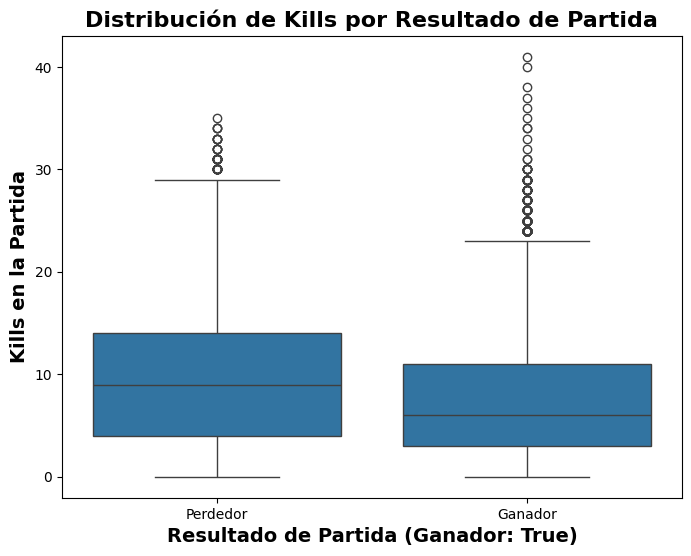

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='MatchWinner', y='MatchKills', data=df)
plt.title('Distribución de Kills por Resultado de Partida', fontsize=16, fontweight="bold")
plt.xlabel('Resultado de Partida (Ganador: True)', fontsize=14, fontweight="bold")
plt.ylabel('Kills en la Partida', fontsize=14, fontweight="bold")
plt.xticks([0, 1], ['Perdedor', 'Ganador'])
plt.show()

Para entender el gráfico se debe saber que a la izquierda se ve la cantidad de kills que hizo el equipo y abajo aparecen los resultados de si perdieron o ganaron.

Se puede observar que los perdedores aunque tengan mayor cantidad de kills no los ayudo a ganar, mientras que los ganadores con menos kills si ganan.

Esto puede ser por varias razones, que el equipo ganador haya hecho explotar o haya desactivado la bomba sin necesidad de matar a todo el equipo contrario o quizás los perdedores pierden por tiempo o falta de coordinación.

Adicional a la información dada se pueden observar varios datos atípicos que serán tratados más adelante.


## 5. Fase 1 - Definición de objetivos fase 3

Se busca saber si los jugadores hacen más kills en algún mapa y en cuáles menos.

In [ ]:
avg_kills_per_map = df.groupby('Map')['MatchKills'].mean().reset_index()

display(avg_kills_per_map)

,Map,MatchKills
0,de_dust2,8.404341
1,de_inferno,8.568811
2,de_mirage,8.458331
3,de_nuke,8.627706


El promedio de kills de cada mapa es similar, esto puede ser por varios factores además del que ya se conoce y es que algunos mapas son más jugados que otros.


## 6. Fase 1 - Definición de objetivos fase 4

Se busca saber si los jugadores que hacen más kills viven más o menos.

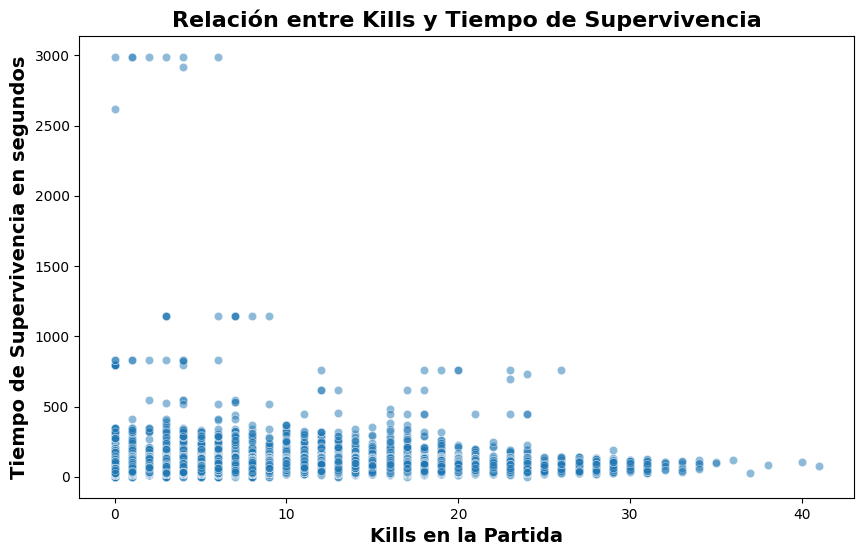

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MatchKills', y='TimeAlive', data=df, alpha=0.5)
plt.title('Relación entre Kills y Tiempo de Supervivencia', fontsize=16, fontweight="bold")
plt.xlabel('Kills en la Partida', fontsize=14, fontweight="bold")
plt.ylabel('Tiempo de Supervivencia en segundos', fontsize=14, fontweight="bold")
plt.show()

Se puede observar que a medida que los jugadores van sacando más kills, el tiempo de supervivencia va disminuyendo, pero una gran parte de la data se centra entre los 500 segundos y 0 a 20 kills.



##7.Fase 1 - Definición de objetivos fase 5

Se busca saber si un mapa influye en que un jugador gane o pierda una partida.

In [ ]:
win_percentage_per_map = df.groupby('Map')['MatchWinner'].value_counts(normalize=True).unstack() * 100
win_percentage_per_map = win_percentage_per_map.rename(columns={False: 'Loss', True: 'Win'})
win_percentage_per_map = win_percentage_per_map.reset_index()

display(win_percentage_per_map)

MatchWinner,Map,Loss,Win
0,de_dust2,52.667364,47.332636
1,de_inferno,54.626069,45.373931
2,de_mirage,51.548452,48.451548
3,de_nuke,52.465223,47.534777


Se puede observar que en promedio los jugadores tienen los mismos porcentajes de victorias y derrotas en cada mapa, excepto en de_inferno donde se aprecia que los jugadores en promedio pierden un 2% más de partidas aproximadamente.



# **Fase 2 - Comprensión de los datos**

## 8. Fase 2 - Análisis de tipos de datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79157 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   SteamId                      79157 non-null  int64  
 7   RoundWinner                  79157 non-null  bool   
 8   MatchWinner                  79157 non-null  bool   
 9   Survived                     79157 non-null  bool   
 10  AbnormalMatch                79157 non-null  bool   
 11  TimeAlive                    79157 non-null  float64
 12  ScaledTimeAlive              79157 non-null  float64
 13  AvgCentroidDista

A primera vista se ve que todas las filas tienen datos, es decir, que no hay nulos. Además, se puede ver el tipo de dato de las columnas que son int, float, bool y object.

Hay 79.157 filas de datos y 37 columnas.

##9. Fase 2 - Existencia de nulos

In [ ]:
# Calcular nulos por columna
columnas_con_nulos = df.isna().sum()

# Porcentaje de nulos
porcentaje_nulos = (columnas_con_nulos / df.shape[0]) * 100

# Construir DataFrame con todas las columnas
resultado = pd.DataFrame({
    "Cantidad Nulos": columnas_con_nulos,
    "Porcentaje Nulos (%)": porcentaje_nulos
}).round(2)

# Si no hay nulos en ninguna columna, se crea una condición para que muestre 0
if resultado["Cantidad Nulos"].sum() == 0:
    resultado.loc[:, "Cantidad Nulos"] = 0
    resultado.loc[:, "Porcentaje Nulos (%)"] = 0.0

resultado


,Cantidad Nulos,Porcentaje Nulos (%)
Unnamed: 0,0,0.0
Map,0,0.0
Team,0,0.0
InternalTeamId,0,0.0
MatchId,0,0.0
RoundId,0,0.0
SteamId,0,0.0
RoundWinner,0,0.0
MatchWinner,0,0.0
Survived,0,0.0


No se aprecian nulos.

## 10. Fase 2 - Existencia de duplicados

In [ ]:

# Recorremos todas las columnas del DataFrame
for columna in df.columns:
    # Imprimimos el nombre de la columna y la cantidad de filas duplicadas en esa columna

    # {columna:<27} → Formatea el nombre de la columna:
    # - < : alineación a la izquierda
    # - 27: ancho mínimo de 27 caracteres (rellena con espacios si el nombre es más corto)

    # df[columna].duplicated().sum():
    # - df[columna].duplicated() genera una serie booleana donde True = valor repetido (después de su primera aparición)
    # - .sum() cuenta los True, es decir, la cantidad de duplicados en esa columna

    print(f"{columna:<27} ----> {df[columna].duplicated().sum()}")

Unnamed: 0                  ----> 0
Map                         ----> 79153
Team                        ----> 79155
InternalTeamId              ----> 79155
MatchId                     ----> 78824
RoundId                     ----> 79121
SteamId                     ----> 78795
RoundWinner                 ----> 79155
MatchWinner                 ----> 79155
Survived                    ----> 79155
AbnormalMatch               ----> 79156
TimeAlive                   ----> 27529
ScaledTimeAlive             ----> 35125
AvgCentroidDistance         ----> 14175
TravelledDistance           ----> 1156
AvgRoundVelocity            ----> 1141
AvgKillDistance             ----> 43568
AvgSiteDistance             ----> 937
RLethalGrenadesThrown       ----> 79152
RNonLethalGrenadesThrown    ----> 79150
PrimaryAssaultRifle         ----> 74833
PrimarySniperRifle          ----> 75108
PrimaryHeavy                ----> 78970
PrimarySMG                  ----> 78997
PrimaryPistol               ----> 79155
FirstKil

In [ ]:
# Filtra las filas duplicadas en todo el DataFrame
duplicados = df[df.duplicated(keep=False)]

# Muestra el resultado
duplicados

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist


Se realizó una búsqueda de filas duplicadas en el conjunto de datos y se confirmó que no existen, lo que indica una buena calidad inicial en la recolección de los datos.

## 11. Fase 2 - Existencia de atípicos


Se buscó el mapa más popular del Counter.

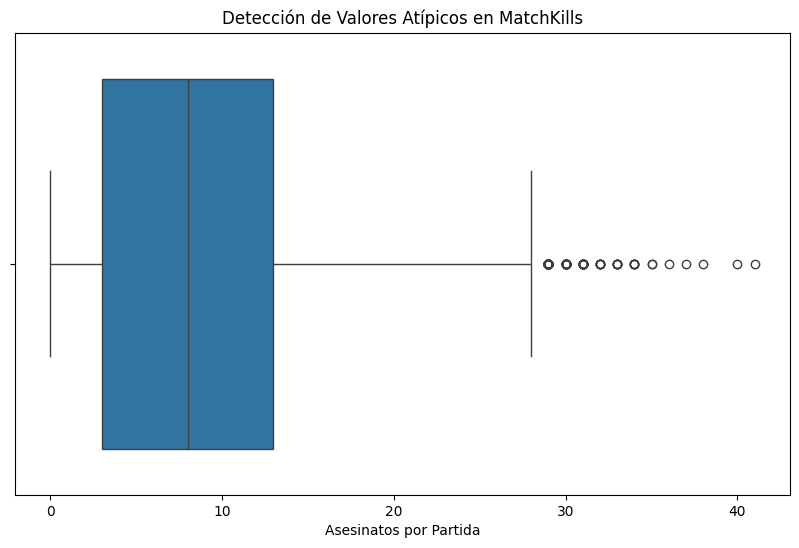

El límite superior para considerar un valor como atípico es: 28.00 kills.
Número de valores atípicos detectados en MatchKills: 162


In [ ]:
# Crear un boxplot para la variable 'MatchKills'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['MatchKills'])
plt.title('Detección de Valores Atípicos en MatchKills')
plt.xlabel('Asesinatos por Partida')
plt.show()

# Cuantificar los outliers usando el método IQR
Q1 = df['MatchKills'].quantile(0.25)
Q3 = df['MatchKills'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR

outliers_count = df[df['MatchKills'] > limite_superior].shape[0]
print(f"El límite superior para considerar un valor como atípico es: {limite_superior:.2f} kills.")
print(f"Número de valores atípicos detectados en MatchKills: {outliers_count}")

In [ ]:
mapas_populares = df['Map'].value_counts().head(5)
mapas_populares



,count
Map,
de_inferno,28869
de_dust2,19120
de_mirage,19019
de_nuke,12149


Inferno fue el más popular, ahora se observará cuántos headshots se hacen por ronda.

In [ ]:
df_inferno = df[df['Map'] == 'de_inferno']


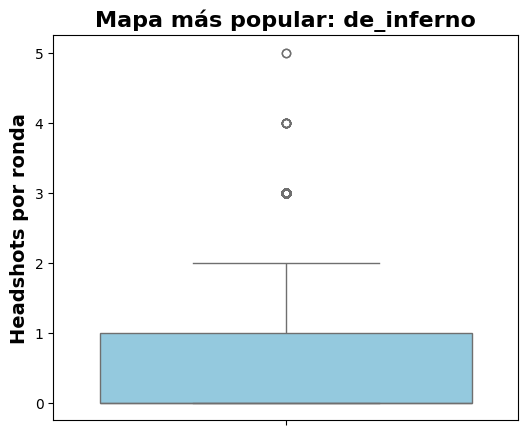

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(y='RoundHeadshots', data=df_inferno, color='skyblue')

plt.title('Mapa más popular: de_inferno', fontsize=16, fontweight="bold")
plt.ylabel('Headshots por ronda', fontsize=14, fontweight="bold")
plt.show()

Se puede observar que hay datos de que se pegan hasta 5 headshots por ronda, pero la gran mayoría se centra entre 0 y 1.

## 12. Fase 2 - Cálculo de estadísticos de variable continua


Se analizará la variable TimeAlive.

In [ ]:
print(df['TimeAlive'].describe())

count    79157.000000
mean        72.795720
std         48.321035
min          0.000000
25%         47.080072
50%         69.239615
75%         92.647813
max       2990.560394
Name: TimeAlive, dtype: float64


## 13. Fase 2 - Interpretación de estadísticos de variable continua


La variable TimeAlive tiene una media (mean) de 72.79 segundos. La desviación estándar (std) es de 48.32 segundos. Este valor es relativamente alto e indica una gran variabilidad en el tiempo que los jugadores permanecen vivos. En el contexto del juego, esto tiene sentido: algunos jugadores son eliminados muy temprano en la partida, mientras que otros pueden sobrevivir hasta el final, generando una dispersión significativa en los datos alrededor de la media.

## 14. Fase 2 - Cálculo de estadísticos de variable discreta


Se analizará la variable discreta.

Frecuencia de partidas por mapa:
Map
de_inferno    28869
de_dust2      19120
de_mirage     19019
de_nuke       12149
Name: count, dtype: int64


/tmp/ipython-input-2885858346.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Map'], order = df['Map'].value_counts().index, palette='viridis')


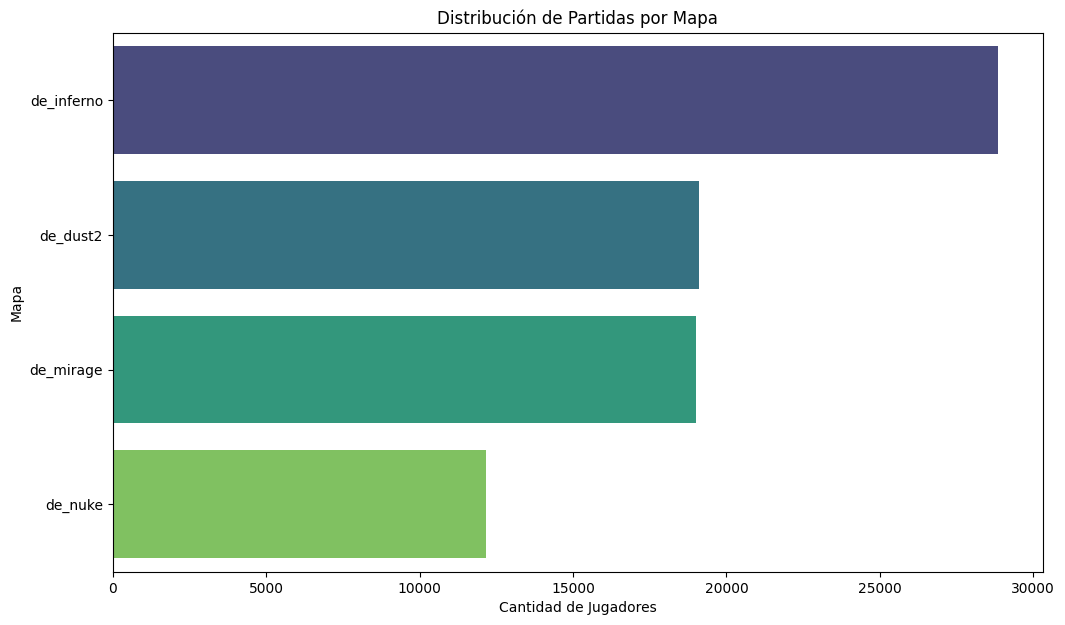

In [ ]:
# Calcular las frecuencias de cada mapa
print("Frecuencia de partidas por mapa:")
print(df['Map'].value_counts())

# Gráfico de barras para visualizar la distribución
plt.figure(figsize=(12, 7))
sns.countplot(y=df['Map'], order = df['Map'].value_counts().index, palette='viridis')
plt.title('Distribución de Partidas por Mapa')
plt.xlabel('Cantidad de Jugadores')
plt.ylabel('Mapa')
plt.show()

## 15. Fase 2 - Interpretación de estadísticos de variable discreta


El mapa 'de_inferno' es el más frecuente en el conjunto de datos, seguido por 'de_dust2', 'de_mirage' y 'de_nuke'. Este desbalance es importante a tener en cuenta para futuros modelos, ya que el modelo tendrá más datos para aprender sobre los mapas más populares.

## 16. Fase 2 - Aplicación CORRECTA de prueba ANOVA


## 17. Fase 2 - Análisis de distribución de una variable


## 18. Fase 2 - Análisis correcto de correlación


# Fase 3 - Preparación de los datos

##19. Fase 3 - Justificación y aplicación correcta de transformación de variable continua

##20. Fase 3 - Justificación y aplicación correcta de transformación de variable discreta

##21. Fase 3 - Análisis de distribución de variable continua ANTES y DESPUÉS de transformación